In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)


from matplotlib.pyplot import figure
import matplotlib.dates as mdates
import scipy.stats as sp
from scipy.stats.stats import pearsonr
from datetime import datetime
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.formula.api as smf

In [2]:
data_er=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="ER",index_col="Date")
print(data_er.head(5))

            USD_CNY  USD_JPY  EUR_USD  USD_CAD  AUD_USD  USD_CHF  GBP_USD
Date                                                                     
1999-01-01   8.2778   116.32   1.1366   1.5105   0.6305   1.4160   1.6458
1999-02-01   8.2790   119.17   1.1025   1.5080   0.6188   1.4463   1.6030
1999-03-01   8.2800   118.86   1.0770   1.5080   0.6347   1.4825   1.6107
1999-04-01   8.2790   119.49   1.0570   1.4565   0.6615   1.5255   1.6095
1999-05-01   8.2784   121.52   1.0423   1.4739   0.6488   1.5272   1.6030


In [3]:
data_v=pd.read_excel("Data_COMP5212project.xlsx",sheet_name="Variables", index_col="Date")
print(data_v.head(5))

            Shanghai    SP500  Nikkei225  EuroStoxx50    SPTSX  SPASX200  \
Date                                                                       
1999-01-01   1134.67  1279.64   14499.25          NaN  6729.56    2781.7   
1999-02-01   1090.09  1238.33   14367.54          NaN  6312.69    2768.4   
1999-03-01   1158.05  1286.37   15836.59          NaN  6597.79    2867.0   
1999-04-01   1120.93  1335.18   16701.53          NaN  7014.70    3027.8   
1999-05-01   1279.33  1301.84   16111.65          NaN  6841.80    2831.9   

               SMI  FT100  GoldPrice  BrentOilFutures  ...  STINT_CHE  \
Date                                                   ...              
1999-01-01  7201.2    NaN      286.3            11.35  ...    1.27167   
1999-02-01  7063.8    NaN      287.5            10.88  ...    1.26167   
1999-03-01  7130.2    NaN      279.8            15.24  ...    1.24833   
1999-04-01  7335.5    NaN      286.8            16.57  ...    0.99333   
1999-05-01  6911.6    NaN    

In [4]:
df_all=data_er.join(data_v)

In [5]:
df_all.tail()

,USD_CNY,USD_JPY,EUR_USD,USD_CAD,AUD_USD,USD_CHF,GBP_USD,Shanghai,SP500,Nikkei225,...,STINT_CHE,STINT_GBR,LTINT_CHN,LTINT_USA,LTINT_JPN,LTINT_EA19,LTINT_CAN,LTINT_AUS,LTINT_CHE,LTINT_GBR
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-01,6.6927,104.64,1.1647,1.3317,0.7026,0.9167,1.2941,3224.53,3269.96,22977.13,...,-0.7666,0.05,NaN,0.79,0.040,0.0005,0.602857,0.82,-0.518,0.3058
2020-11-01,6.5789,104.27,1.1928,1.3000,0.7345,0.9090,1.3321,3391.76,3621.63,26433.62,...,-0.7840,0.04,NaN,0.87,0.030,-0.0553,0.688500,0.87,-0.509,0.3836
2020-12-01,6.5250,103.24,1.2213,1.2730,0.7694,0.8851,1.3673,3473.07,3756.07,27444.17,...,-0.7638,0.03,NaN,0.93,0.020,-0.0915,0.730952,0.98,-0.525,0.3224
2021-01-01,6.4250,104.68,1.2136,1.2777,0.7642,0.8903,1.3702,3483.07,3714.24,27663.39,...,-0.7600,0.03,NaN,1.08,0.055,-0.0636,0.805500,1.05,-0.450,0.3672
2021-02-01,6.4730,106.58,1.2074,1.2739,0.7705,0.9082,1.3932,3509.08,3811.15,28966.01,...,-0.7500,0.05,NaN,1.26,0.150,0.0668,1.099474,1.32,-0.230,NaN


In [6]:
df_usdeu=df_all[['EUR_USD', 'SP500','EuroStoxx50','GoldPrice','BrentOilFutures', 'CPI_USA', 'CPI_EU', 'STINT_USA', 'STINT_EA19', 'LTINT_USA', 'LTINT_EA19']]

#add 1st differenced data
df_usdeu['EUR_USD_diff']=df_usdeu['EUR_USD'].diff(1)
df_usdeu['SP500_diff']=df_usdeu['SP500'].diff(1)
df_usdeu['EuroStoxx50_diff']=df_usdeu['EuroStoxx50'].diff(1)
df_usdeu['GoldPrice_diff']=df_usdeu['GoldPrice'].diff(1)
df_usdeu['BrentOilFutures_diff']=df_usdeu['BrentOilFutures'].diff(1)

df_usdeu['CPI_USA_diff']=df_usdeu['CPI_USA'].diff(1)
df_usdeu['CPI_EU_diff']=df_usdeu['CPI_EU'].diff(1)

df_usdeu['STINT_USA_diff']=df_usdeu['STINT_USA'].diff(1)
df_usdeu['STINT_EA19_diff']=df_usdeu['STINT_EA19'].diff(1)
df_usdeu['STINT_USA_EA19']=df_usdeu['STINT_USA']-df_usdeu['STINT_EA19']
df_usdeu['STINT_USA_EA19_diff']=df_usdeu['STINT_USA_diff']-df_usdeu['STINT_EA19_diff']

df_usdeu['LTINT_USA_diff']=df_usdeu['LTINT_USA'].diff(1)
df_usdeu['LTINT_EA19_diff']=df_usdeu['LTINT_EA19'].diff(1)
df_usdeu['LTINT_USA_EA19']=df_usdeu['LTINT_USA']-df_usdeu['LTINT_EA19']
df_usdeu['LTINT_USA_EA19_diff']=df_usdeu['LTINT_USA_diff']-df_usdeu['LTINT_EA19_diff']

df_usdeu.dropna(inplace=True)
df_usdeu.tail()
#print(df_usdeu.iloc[:,0])


,EUR_USD,SP500,EuroStoxx50,GoldPrice,BrentOilFutures,CPI_USA,CPI_EU,STINT_USA,STINT_EA19,LTINT_USA,...,CPI_USA_diff,CPI_EU_diff,STINT_USA_diff,STINT_EA19_diff,STINT_USA_EA19,STINT_USA_EA19_diff,LTINT_USA_diff,LTINT_EA19_diff,LTINT_USA_EA19,LTINT_USA_EA19_diff
Date,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1.1718,3363.00,3193.61,1907.8,40.95,109.8149,105.73,0.13,-0.4914,0.68,...,0.1527,0.04,-0.02,-0.0117,0.6214,-0.0083,0.03,-0.0375,0.5570,0.0675
2020-10-01,1.1647,3269.96,2958.21,1892.4,37.46,109.8605,105.92,0.12,-0.5091,0.79,...,0.0456,0.19,-0.01,-0.0177,0.6291,0.0077,0.11,-0.1225,0.7895,0.2325
2020-11-01,1.1928,3621.63,3492.54,1784.8,47.59,109.7934,105.63,0.16,-0.5209,0.87,...,-0.0671,-0.29,0.04,-0.0118,0.6809,0.0518,0.08,-0.0558,0.9253,0.1358
2020-12-01,1.2213,3756.07,3552.64,1899.6,51.80,109.8968,105.97,0.17,-0.5381,0.93,...,0.1034,0.34,0.01,-0.0172,0.7081,0.0272,0.06,-0.0362,1.0215,0.0962
2021-01-01,1.2136,3714.24,3481.44,1850.3,55.88,110.3642,106.27,0.14,-0.5472,1.08,...,0.4674,0.30,-0.03,-0.0091,0.6872,-0.0209,0.15,0.0279,1.1436,0.1221


In [7]:
minmax = MinMaxScaler().fit(df_usdeu.iloc[:, 0:1].astype('float32')) # Close index
df_log = minmax.transform(df_usdeu.iloc[:, 0:1].astype('float32')) # Close index
df_log = pd.DataFrame(df_log)
df_log.head()

,0
0,0.203119
1,0.281095
2,0.394066
3,0.371434
4,0.375428


In [8]:
"""
分割训练和测试¶
我将分割数据集来训练和测试数据集，

从开始时间到最后30天的训练数据集

测试从最近30天派生的数据集，直到数据集结束

所以我们将让模型根据过去30天来做预测，我们将重复这个实验10次。
如果需要，您可以在本地增加它，调优参数会给您带来很大帮助。
"""

'\n分割训练和测试¶\n我将分割数据集来训练和测试数据集，\n\n从开始时间到最后30天的训练数据集\n\n测试从最近30天派生的数据集，直到数据集结束\n\n所以我们将让模型根据过去30天来做预测，我们将重复这个实验10次。\n如果需要，您可以在本地增加它，调优参数会给您带来很大帮助。\n'

In [9]:
#Split train and test

test_size = 30
simulation_size = 10

df_train = df_log.iloc[:-test_size]
df_test = df_log.iloc[-test_size:]
df_usdeu.shape, df_train.shape, df_test.shape

((208, 26), (178, 1), (30, 1))

In [10]:
class Model:
    def __init__(
        self,
        learning_rate,
        num_layers,
        size,
        size_layer,
        output_size,
        forget_bias = 0.1,
    ):
        def lstm_cell(size_layer):
            return tf.nn.rnn_cell.GRUCell(size_layer)

        rnn_cells = tf.nn.rnn_cell.MultiRNNCell(
            [lstm_cell(size_layer) for _ in range(num_layers)],
            state_is_tuple = False,
        )
        self.X = tf.placeholder(tf.float32, (None, None, size))
        self.Y = tf.placeholder(tf.float32, (None, output_size))
        drop = tf.contrib.rnn.DropoutWrapper(
            rnn_cells, output_keep_prob = forget_bias
        )
        self.hidden_layer = tf.placeholder(
            tf.float32, (None, num_layers * size_layer)
        )
        self.outputs, self.last_state = tf.nn.dynamic_rnn(
            drop, self.X, initial_state = self.hidden_layer, dtype = tf.float32
        )
        self.logits = tf.layers.dense(self.outputs[-1], output_size)
        self.cost = tf.reduce_mean(tf.square(self.Y - self.logits))
        self.optimizer = tf.train.AdamOptimizer(learning_rate).minimize(
            self.cost
        )
        
def calculate_accuracy(real, predict):
    real = np.array(real) + 1
    predict = np.array(predict) + 1
    percentage = 1 - np.sqrt(np.mean(np.square((real - predict) / real)))
    return percentage * 100

def anchor(signal, weight):
    buffer = []
    last = signal[0]
    for i in signal:
        smoothed_val = last * weight + (1 - weight) * i
        buffer.append(smoothed_val)
        last = smoothed_val
    return buffer

In [11]:
num_layers = 1
size_layer = 128
timestamp = 5
epoch = 300
dropout_rate = 0.8
future_day = test_size
learning_rate = 0.01

In [12]:
def forecast():
    tf.reset_default_graph()
    modelnn = Model(
        learning_rate, num_layers, df_log.shape[1], size_layer, df_log.shape[1], dropout_rate
    )
    sess = tf.InteractiveSession()
    sess.run(tf.global_variables_initializer())
    date_ori = pd.to_datetime(df_usdeu.iloc[:, 0]).tolist()

    pbar = tqdm(range(epoch), desc = 'train loop')
    for i in pbar:
        init_value = np.zeros((1, num_layers * size_layer))
        total_loss, total_acc = [], []
        for k in range(0, df_train.shape[0] - 1, timestamp):
            index = min(k + timestamp, df_train.shape[0] - 1)
            batch_x = np.expand_dims(
                df_train.iloc[k : index, :].values, axis = 0
            )
            batch_y = df_train.iloc[k + 1 : index + 1, :].values
            logits, last_state, _, loss = sess.run(
                [modelnn.logits, modelnn.last_state, modelnn.optimizer, modelnn.cost],
                feed_dict = {
                    modelnn.X: batch_x,
                    modelnn.Y: batch_y,
                    modelnn.hidden_layer: init_value,
                },
            )        
            init_value = last_state
            total_loss.append(loss)
            total_acc.append(calculate_accuracy(batch_y[:, 0], logits[:, 0]))
        pbar.set_postfix(cost = np.mean(total_loss), acc = np.mean(total_acc))
    
    future_day = test_size

    output_predict = np.zeros((df_train.shape[0] + future_day, df_train.shape[1]))
    output_predict[0] = df_train.iloc[0]
    upper_b = (df_train.shape[0] // timestamp) * timestamp
    init_value = np.zeros((1, num_layers * size_layer))

    for k in range(0, (df_train.shape[0] // timestamp) * timestamp, timestamp):
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(
                    df_train.iloc[k : k + timestamp], axis = 0
                ),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[k + 1 : k + timestamp + 1] = out_logits

    if upper_b != df_train.shape[0]:
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(df_train.iloc[upper_b:], axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        output_predict[upper_b + 1 : df_train.shape[0] + 1] = out_logits
        future_day -= 1
        date_ori.append(date_ori[-1] + timedelta(days = 1))

    init_value = last_state
    
    for i in range(future_day):
        o = output_predict[-future_day - timestamp + i:-future_day + i]
        out_logits, last_state = sess.run(
            [modelnn.logits, modelnn.last_state],
            feed_dict = {
                modelnn.X: np.expand_dims(o, axis = 0),
                modelnn.hidden_layer: init_value,
            },
        )
        init_value = last_state
        output_predict[-future_day + i] = out_logits[-1]
        date_ori.append(date_ori[-1] + timedelta(days = 1))
    
    output_predict = minmax.inverse_transform(output_predict)
    deep_future = anchor(output_predict[:, 0], 0.3)
    
    return deep_future[-test_size:]

In [13]:
results = []
for i in range(simulation_size):
    print('simulation %d'%(i + 1))
    results.append(forecast())

simulation 1
Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argu

train loop: 100%|██████████| 300/300 [00:32<00:00,  9.17it/s, acc=92.8, cost=0.0117] 


simulation 2


train loop: 100%|██████████| 300/300 [00:33<00:00,  9.04it/s, acc=93.7, cost=0.00866]


simulation 3


train loop: 100%|██████████| 300/300 [00:34<00:00,  8.81it/s, acc=91.1, cost=0.019]  


simulation 4


train loop: 100%|██████████| 300/300 [00:33<00:00,  8.98it/s, acc=90, cost=0.0249]   


simulation 5


train loop: 100%|██████████| 300/300 [00:35<00:00,  8.39it/s, acc=94, cost=0.00903]  


simulation 6


train loop: 100%|██████████| 300/300 [00:37<00:00,  8.03it/s, acc=88.9, cost=0.0326] 


simulation 7


train loop: 100%|██████████| 300/300 [00:37<00:00,  8.10it/s, acc=92, cost=0.0147]   


simulation 8


train loop: 100%|██████████| 300/300 [00:34<00:00,  8.74it/s, acc=92.7, cost=0.0123] 


simulation 9


train loop: 100%|██████████| 300/300 [00:37<00:00,  8.06it/s, acc=78.5, cost=0.107] 


simulation 10


train loop: 100%|██████████| 300/300 [00:37<00:00,  8.01it/s, acc=90.9, cost=0.0224] 


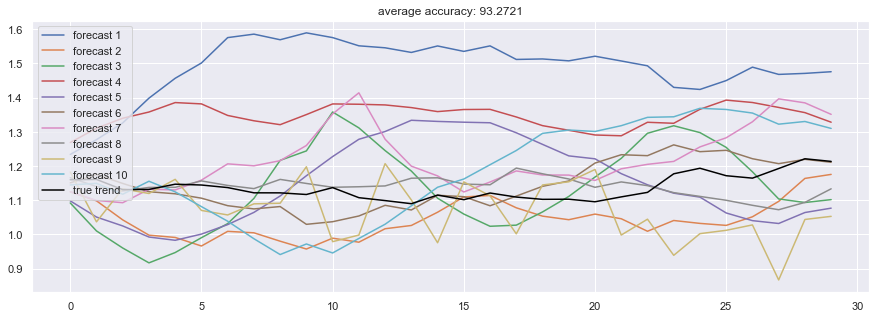

In [14]:
accuracies = [calculate_accuracy(df_usdeu['EUR_USD'].iloc[-test_size:].values, r) for r in results]

plt.figure(figsize = (15, 5))
for no, r in enumerate(results):
    plt.plot(r, label = 'forecast %d'%(no + 1))
plt.plot(df_usdeu['EUR_USD'].iloc[-test_size:].values, label = 'true trend', c = 'black')
plt.legend()
plt.title('average accuracy: %.4f'%(np.mean(accuracies)))
plt.show()


In [33]:
Predictions=df_usdeu['EUR_USD'].iloc[-test_size:].values
Real= results

errors = abs(Predictions - Real)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

for r in (results):
    MAE=metrics.mean_absolute_error(r, Predictions)
    print('MAE:', MAE)
    
    MSE=metrics.mean_squared_error(r, Predictions)
    print('MSE:', MSE)
    
    RMSE=np.sqrt(metrics.mean_squared_error(r, Predictions))
    print('RMSE:', RMSE)
    
    R2=metrics.r2_score(r, Predictions)
    print('R-squared:', R2)
    
#print('MAE:', metrics.mean_absolute_error(Real, Predictions))
#print('MSE:', metrics.mean_squared_error(Real, Predictions))
#print('RMSE:', np.sqrt(metrics.mean_squared_error(Real, Predictions)))
#print('R-squared: ',metrics.r2_score(Real, Predictions)) 

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Real)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.13 degrees.
MAE: 0.3497138517433604
MSE: 0.13345581478674895
RMSE: 0.3653160478089471
R-squared: -17.33438672223391
MAE: 0.09297833484859745
MSE: 0.011070245417960234
RMSE: 0.10521523377325279
R-squared: -2.670574709136593
MAE: 0.1091621317147165
MSE: 0.015506918812235287
RMSE: 0.12452677949836849
R-squared: -0.0874611156260654
MAE: 0.20908585722916956
MSE: 0.04571134413992544
RMSE: 0.21380211444212951
R-squared: -43.233901998773085
MAE: 0.12757388173872314
MSE: 0.019805000517369917
RMSE: 0.14073024023773256
R-squared: -0.4976340071389147
MAE: 0.043124411216974794
MSE: 0.003137681904868637
RMSE: 0.05601501499480864
R-squared: 0.314844410127771
MAE: 0.09322549507625975
MSE: 0.0133821346933591
RMSE: 0.11568117691897459
R-squared: -0.6776397557836837
MAE: 0.045296119951489716
MSE: 0.0031965116404604485
RMSE: 0.0565377010539025
R-squared: -3.6714314739513823
MAE: 0.0977574398627806
MSE: 0.015054270669099588
RMSE: 0.12269584617703888
R-squared: -1.2228976933463365
MAE